In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install libais

     |████████████████████████████████| 163kB 2.8MB/s 
  Created wheel for libais: filename=libais-0.17-cp36-cp36m-linux_x86_64.whl size=1040951 sha256=9801460cec250e072806abe39e50fdd3d404adebc4608a5b38befe2752af7d83
  Stored in directory: /root/.cache/pip/wheels/2f/bc/f8/902480382d20985b4c59b0d505d4897c25c0d64e3cba51df33
Successfully built libais


In [0]:
import ais.stream

file = open("demofile2.csv", "a")
array_x = []
array_y = []
array_coords = []
full_ais = []
with open("/content/drive/My Drive/2020-01-29.nmea") as f:
    for msg in ais.stream.decode(f):
        try:
          full_msg = []
          tuple_coords = []
          tuple_coords = [msg['x'], msg['y'], msg['sog'], msg['timestamp'], msg['mmsi']]
          full_msg = [msg]
          full_ais.append(full_msg)
          array_coords.append(tuple_coords)
        except:
          pass

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The stream module is deprecated and will be removed in 1.0
  """Entry point for launching an IPython kernel.


In [0]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

array_coords = np.asarray(array_coords)

# select limited field for micro-analysis
df = pd.DataFrame(data=array_coords, columns=["lng", "lat", "sog", "timestamp", "mmsi"])
df2 = df[(df['lng'] < 4.91)]  
df2 = df2[(df['lng'] > 4.902)]  
df3 = df2[(df['lat'] < 52.3765)]  
df4 = df3[(df3['lat'] > 52.3715)]
df5 = df4[(df4['sog'] > 0.5)]  


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


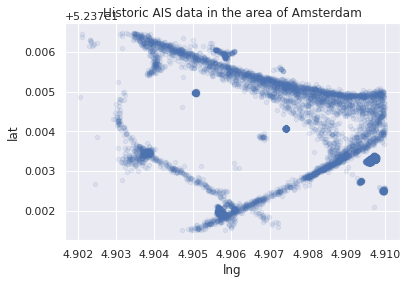

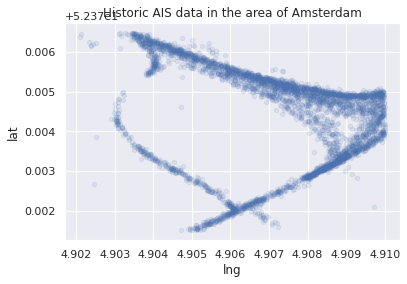

In [0]:
df4.plot(kind="scatter", x="lng", y="lat", alpha=0.1, title='Historic AIS data in the area of Amsterdam')
df5.plot(kind="scatter", x="lng", y="lat", alpha=0.1, title='Historic AIS data in the area of Amsterdam')


In [0]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

%matplotlib inline

In [0]:
data = df5
data.head()

#create subset for testing - needed as model sometimes crashes the notebook
data_small = data.sample(frac=0.99, replace=True, random_state=1)

In [0]:
#prepare data for model
dbscan_data = data[['lng', 'lat']] 
dbscan_data = dbscan_data.values.astype('float32', copy=False)
dbscan_data 

# prepare small subset
dbscan_data_small = data_small[['lng', 'lat']] 
dbscan_data_small = dbscan_data_small.values.astype('float32', copy=False)
dbscan_data_small 

array([[ 4.9023933, 52.37618  ],
       [ 4.909915 , 52.374603 ],
       [ 4.9040484, 52.376255 ],
       ...,
       [ 4.909945 , 52.37401  ],
       [ 4.9051566, 52.372723 ],
       [ 4.9086785, 52.374477 ]], dtype=float32)

In [0]:
#Normalize data 
dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)

# create smaller sample for testing
dbscan_data_scaler_small = StandardScaler().fit(dbscan_data_small)
dbscan_data_small = dbscan_data_scaler_small.transform(dbscan_data_small)
len(dbscan_data_small)

4156

In [0]:
#Construct model
'''
-- min samples :: requires a minimum 10 data points in a neighbourhood
-- eps :: in radius 0.15
'''

model = DBSCAN(eps=0.15, min_samples=10, metric='euclidean').fit(dbscan_data_small)
model

DBSCAN(algorithm='auto', eps=0.15, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [0]:
#Seperate outliers from clustered data
outliers_df = data_small[model.labels_ == -1]
clusters_df = data_small[model.labels_ != -1]

clusters_df.to_csv('clusters.csv', index=False)

colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = 'black'

#Get info about the clusters
clusters = Counter(model.labels_)
print(clusters)
print(data_small[model.labels_ == -1].head())
print('Number of clusters = {}'.format(len(clusters)-1))

Counter({0: 4129, -1: 27})
              lng        lat  sog  timestamp         mmsi
54835    4.902393  52.376178  2.2       46.0  244060730.0
550607   4.903148  52.376095  3.7       28.0  244860069.0
2088419  4.905427  52.376122  1.4       13.0  244022178.0
2051635  4.909150  52.372937  1.9       44.0  244750576.0
2106222  4.907162  52.375577  1.3        0.0  244130279.0
Number of clusters = 1


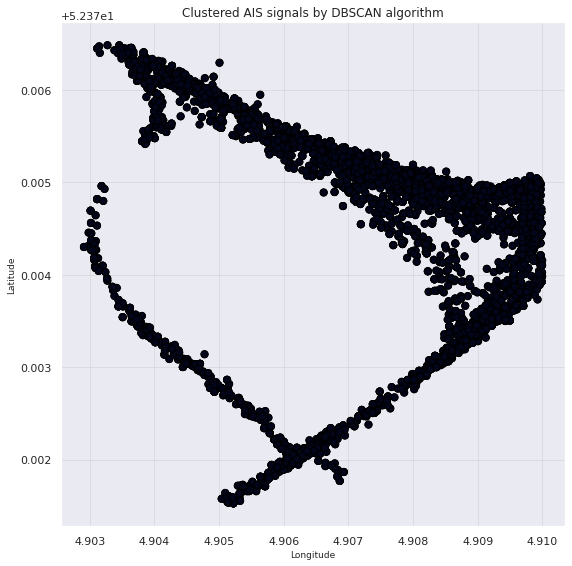

In [0]:
# Plot clusters and outliers
rcParams['figure.figsize'] = 7, 7

fig = plt.figure()

ax = fig.add_axes([.1, .1, 1, 1])

ax.scatter(clusters_df['lng'], clusters_df['lat'],
           c = colors_clusters, edgecolors='black', s=50)
ax.scatter(clusters_df['lng'], clusters_df['lat'],
           c = colors_clusters, edgecolors='black', s=50)

ax.set_xlabel('Longitude', fontsize=9)
ax.set_ylabel('Latitude', fontsize=9)

plt.title('Clustered AIS signals by DBSCAN algorithm', fontsize=12)

plt.grid(which='major', color='#cccccc', alpha=0.45)

fig.savefig('clusters2.png')

plt.show()

In [0]:
doubles = clusters_df['mmsi'].value_counts()
# sequence = clusters_df[:10]
# sequence = sequence.drop([233926, 38593])
# sequence = sequence.drop(['sog'], axis =1)
doubles.tail(40)
# sequence

trail = clusters_df[clusters_df['mmsi'] == 244750255.0]

In [0]:
trail.drop_duplicates()

,lng,lat,sog,timestamp,mmsi
2071459,4.905438,52.375643,3.2,0.0,244750255.0
2076456,4.908955,52.373503,3.1,29.0,244750255.0
2079267,4.906820,52.372240,3.7,29.0,244750255.0
2077879,4.908102,52.372873,3.6,29.0,244750255.0
2069960,4.904213,52.376060,2.9,0.0,244750255.0
2070706,4.904845,52.375867,3.1,30.0,244750255.0
2072244,4.906055,52.375392,3.2,29.0,244750255.0
2073983,4.907540,52.374820,3.3,39.0,244750255.0
2075153,4.908497,52.374317,3.3,29.0,244750255.0
2077170,4.908683,52.373167,2.8,0.0,244750255.0


In [0]:
trail.to_csv('trail.csv')
# trail = trail[trail['timestamp'] == 45.0]
# trail = trail.drop(1923993)

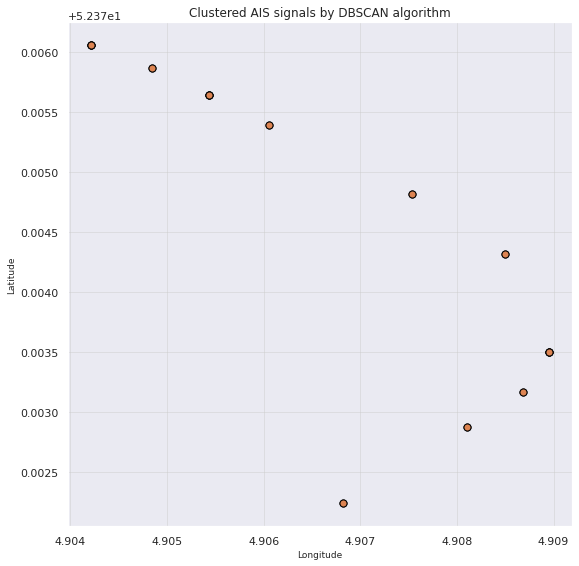

In [0]:
from scipy.interpolate import interp1d

rcParams['figure.figsize'] = 7, 7

fig = plt.figure()

ax = fig.add_axes([.1, .1, 1, 1])

ax.scatter(trail['lng'], trail['lat'],
           edgecolors='black', s=50)
ax.scatter(trail['lng'], trail['lat'],
           edgecolors='black', s=50)


ax.set_xlabel('Longitude', fontsize=9)
ax.set_ylabel('Latitude', fontsize=9)

plt.title('Clustered AIS signals by DBSCAN algorithm', fontsize=12)

plt.grid(which='major', color='#cccccc', alpha=0.45)

# fig.savefig('clusters2.png')

plt.show()